In [7]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pickle

In [14]:

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rc('grid', linestyle='--')
plt.rc('grid', color='#E68F6B')
from ast import literal_eval as make_tuple
def get_scan_range(file_name):
    range_ = ""
    with open(file_name, "r") as f:
        for line in f.readlines():
            if "scan range" in line:
                range_ = line
    return make_tuple(range_.strip().split("=")[-1])


In [4]:
folder = r"C:\Users\yy3\Documents\data\Vlad\26-03-2023\158\#1_D\defects"
folder = os.path.join(folder, r"auto_3_0")

In [5]:
defs = os.listdir(folder)
dics = []
for df in defs:
    dct = [d for d in os.listdir(os.path.join(folder, df)) if "results" in d]
    if len(dct) > 0:
        dics.append(dct[0])

In [13]:
wlngths = []
SOCs = []
ples = []
for def_ in defs[-1:]:
        if os.path.exists(os.path.join(folder, def_, f'results_{def_}')):
                with open(os.path.join(folder, def_, f'results_{def_}'), 'rb') as handle:
                        ddd = pickle.load(handle)
                wlngths.append(ddd["wavelength, THz"])
                SOCs.append(ddd["SOC, GHz"])
                # ples.append(ddd[""])

In [17]:
SOCs

array([], dtype=float64)

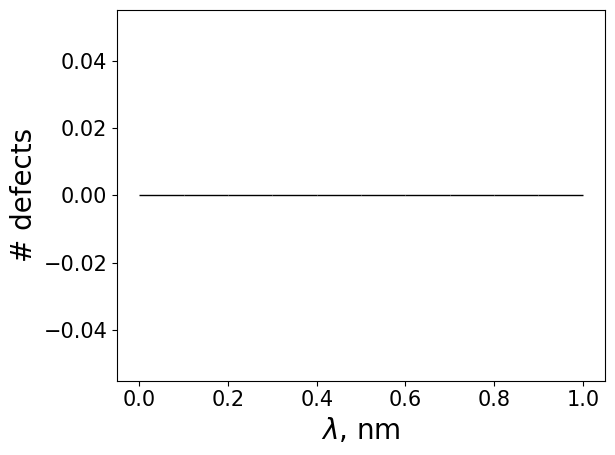

In [16]:
SOCs = np.array(SOCs)
SOCs = SOCs[SOCs > 0]
plt.hist(SOCs, bins=10, ec="black", fc="#79B3F0")
plt.xlabel(r'$\lambda$, nm')
plt.ylabel(r'# defects')
plt.tight_layout()
plt.savefig(os.path.join(folder, "processing.png"), dpi=300)